# Лабораторная работа No8 'Работа с интерактивными блокнотами и файлами

## Цели лабораторной работы:
- Освоить работу с Excel-файлами средствами Python.
- Научиться использовать библиотеку openpyxl для чтения и записи данных.
- Научиться строить столбчатые диаграммы с помощью matplotlib.
- Развить навыки обработки и визуализации табличных данных
## Задачи лабораторной работы:
- Считать данные из Excel-файла с результатами студентов.
- Выполнить вычисления (средние, максимальные, групповые показатели).
- Построить столбчатые диаграммы по заданным вариантам.
- Подписать оси, добавить заголовки и легенды к графикам.
- Сохранить результаты и визуализации в Jupyter Notebook.

#### 1. Получаем из файла имена учашихся и их группы
- Загружаем эксель таблицу и заносим книгу "Группы" в переменную ws_group
- Создаем 2 списка, в которые будем заносить данные
- Циклом перебираем всех учащихся и группы, занося их в списки
- Объеденяем два списка в словарь, где ключ - ФИО учащегося, значение - группа

In [50]:
# Вариант 2
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import pandas as pd
wb = load_workbook(filename = "students.xlsx")

ws_group = wb["Группы"]

groups = []
names = []
for i in range(2, 109):
    names.append(ws_group["A" + str(i)].value)
    groups.append(ws_group["B" + str(i)].value)

group = dict(zip(names, groups))


#### 2. Получаем из файла оценки учашихся
- Заносим книгу "Оценки" в переменную ws_grade
- Создаем 3 списка для каждого предмета
- Циклом перебираем все оценки по предметам, занося их в списки
- Создаем словарь для будущего подсчета среднего балла

In [51]:
ws_grade = wb["Оценки"]

maths = []
physic = []
it = []

for i in range(2, 109):
    maths.append(ws_grade["B" + str(i)].value)
    physic.append(ws_grade["C" + str(i)].value)
    it.append(ws_grade["D" + str(i)].value)

group_grades = {'100':0, '101':0, '102':0, '103':0, '104':0}

#### 3. Считаем средний балл по группам
- Создаем многомерный массив для оценок, где каждый список равен номеру группе
- Запускем цикл, где ищем группы, затем считаем оценки по группе и добавляем их в общий список
- В конце создаем словарь, где ключ - группа, значение - средний балл
- Округляем каждый средний балл до сотых

In [52]:
lists = [[],[],[],[],[]]

for i in range(len(group)):
    if groups[i] == 100:
        group_grades["100"] += maths[i] + physic[i] + it[i]
        lists[0].extend([maths[i], physic[i], it[i]])

    elif groups[i] == 101:
        group_grades["101"] += maths[i] + physic [i] + it[i]
        lists[1].extend([maths[i], physic[i], it[i]])

    elif groups[i] == 102:
        group_grades["102"] += maths[i] + physic [i] + it[i]
        lists[2].extend([maths[i], physic[i], it[i]])

    elif groups[i] == 103:
        group_grades["103"] += maths[i] + physic [i] + it[i]
        lists[3].extend([maths[i], physic[i], it[i]])

    elif groups[i] == 104:
        group_grades["104"] += maths[i] + physic [i] + it[i]
        lists[4].extend([maths[i], physic[i], it[i]])

average = {  "100": round(group_grades["100"] / len(lists[0]), 2),
             "101": round(group_grades["101"] / len(lists[1]), 2),
             "102": round(group_grades["102"] / len(lists[2]), 2),
             "103": round(group_grades["103"] / len(lists[3]), 2),
             "104": round(group_grades["104"] / len(lists[4]), 2)}

#### 4. Строим стобчатую диаграмму
- Получаем список групп для оси x
- Получаем список оценок для оси y
- Строим диаграмму

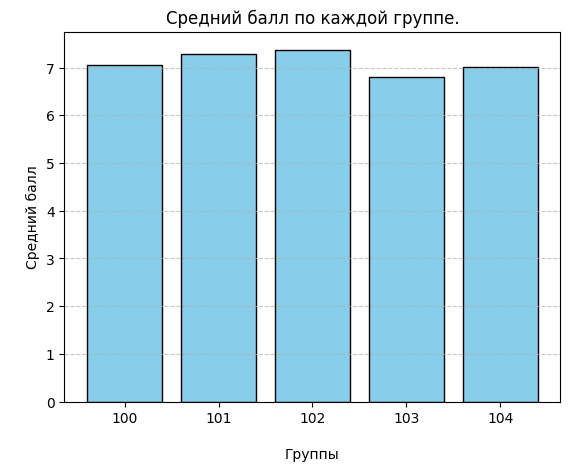

In [53]:
x = list(average.keys())
y = list(average.values())

plt.bar(x, y, color = "skyblue", edgecolor = "black")
plt.title("Cредний балл по каждой группе.")
plt.xlabel('\nГруппы')
plt.ylabel('\nСредний балл')
plt.grid(axis='y', linestyle='--', alpha=0.7)


#### 5. Записываем результат подсчетов
- Превращаем словарь в список пар, создаем таблицу с колонками группа и средний балл.
- Вносим данные в таблицу

In [59]:
df = pd.DataFrame(list(average.items()), columns=['Группа', 'Средний балл'])
df.to_excel('students_result.xlsx', index=False)

#### Вывод:
Я освоил работу с Excel-файлами средствами Python. Научился использовать библиотеку openpyxl для чтения и записи данных.
Научился строить столбчатые диаграммы с помощью matplotlib. Развил навыки обработки и визуализации табличных данных